In [ ]:
!pip install dalex
!pip install scikit-plot
!pip install shap
!pip install eli5
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for dalex: filename=dalex-1.7.0-py3-none-any.whl size=1042471 sha256=10bdf7c0c1e7579e32c9cab3a9142e630634ae0a0321b546169c212667e6ac48
  Stored in directory: /root/.cache/pip/wheels/e2/38/c1/25a95206a4873a287d776fc8e77aa7d93971acc643ecb3db38
Successfully built dalex
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107720 sha256=26567a77e876e3d448f0e000a7ae724e84adbf19d6e542c2648118a4de30d1be
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.p

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
import plotly.express as px
import scikitplot as skplt

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

import dalex as dx
import eli5
from lime.lime_tabular import LimeTabularExplainer

import warnings

# To ignore all warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/bank_churn_dataset/bank_churn_data.csv'
df = pd.read_csv(url)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   10127 non-null  int64  
 1   attrition_flag            10127 non-null  object 
 2   customer_age              10127 non-null  int64  
 3   gender                    10127 non-null  object 
 4   dependent_count           10127 non-null  int64  
 5   education_level           10127 non-null  object 
 6   marital_status            10127 non-null  object 
 7   income_category           10127 non-null  object 
 8   card_category             10127 non-null  object 
 9   months_on_book            10127 non-null  int64  
 10  total_relationship_count  10127 non-null  int64  
 11  months_inactive_12_mon    10127 non-null  int64  
 12  contacts_count_12_mon     10127 non-null  int64  
 13  credit_limit              10127 non-null  float64
 14  total_

In [ ]:
pd.options.display.max_columns = 21
df.head()

,user_id,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


#Data Cleaning

In [ ]:
pd.DataFrame(df.isna().sum())

,0
attrition_flag,0
customer_age,0
gender,0
dependent_count,0
education_level,0
marital_status,0
income_category,0
card_category,0
months_on_book,0
total_relationship_count,0


In [ ]:
df.duplicated().sum()

0

#No.1 Simple EDA

Dengan pertanyaan pada Assignment Guide

##1. Seperti apa distribusi usia para nasabah? Usia manakah yang cenderung memiliki kemungkinan churn terbesar?

In [ ]:
histogram_trace = go.Histogram(x=df['customer_age'],
                               nbinsx=80,
                               hovertemplate='Age: %{x}<br>Total Customer: %{y}',
                               marker=dict(line=dict(color='black', width=1)))
fig = go.Figure(histogram_trace)
fig.update_layout(
    title="Customer distribution base on their age",
    xaxis_title="Age",
    yaxis_title="Total Customer"
)
fig.show()

Ternyata kita memiliki pelanggan dari umur 26 hingga 73

In [ ]:
Attrited = df[df['attrition_flag']=='Attrited Customer']

In [ ]:
no_1 = Attrited.groupby(['customer_age', 'attrition_flag']).size().reset_index()
no_1.columns = ['customer_age', 'attrition_flag','count']
no_1 = no_1.sort_values(by='count', ascending=False)

In [ ]:
no_1.head(10)

,customer_age,attrition_flag,count
22,48,Attrited Customer,85
17,43,Attrited Customer,85
18,44,Attrited Customer,84
20,46,Attrited Customer,82
23,49,Attrited Customer,79
19,45,Attrited Customer,79
15,41,Attrited Customer,76
21,47,Attrited Customer,76
24,50,Attrited Customer,71
28,54,Attrited Customer,69


In [ ]:
px.bar(no_1, x='customer_age', y='count',
       color = 'count',
       orientation='v',
       height=400)

Dari bar chart ini kita bisa melihat mana umur yang paling banyak churn, dan ternyata paling banyak berada pada 48 dan 43 dan sekitar umur 40 hingga 55 terjadi kenaikan churn.

Menjadi target untuk pelayanan kita melayani pelanggan dewasa dan jika berhasil terbukti bisa memastikan kesetiaan pelanggan. Karena pelanggan senior kita (lansian) lebih sedikit.

##2. Apakah terdapat korelasi antara tingkat pendidikan dan income category

In [ ]:
df2 = df.copy()
categorical_future_mask = df2.dtypes==object
categorical_cols = df2.columns[categorical_future_mask].tolist()
le = LabelEncoder()
df2[categorical_cols] = df2[categorical_cols].apply(lambda col: le.fit_transform(col))

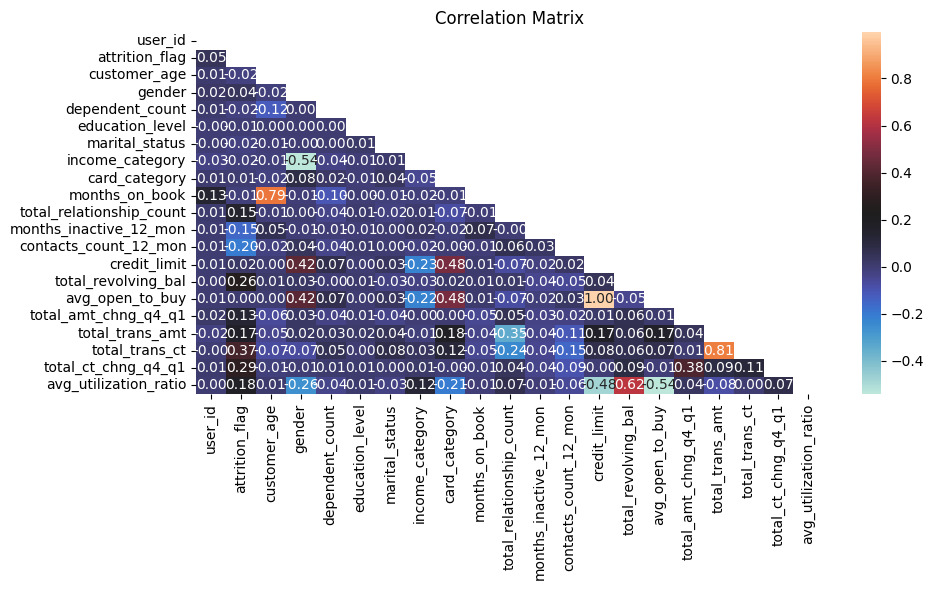

In [ ]:
corr = df2.corr()
mask_ut = np.triu(np.ones(corr.shape)).astype(np.bool_)

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="icefire",
            mask=mask_ut
            )
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

Tidak terdapat korelasi antara pendidikan dengan income category

##3. Apakah terdapat perbedaan yang signifikan antara gender dengan kemungkinan nasabah untuk churn?

In [ ]:
no_2 = df.groupby(['gender', 'attrition_flag']).size().reset_index()
no_2.columns = ['gender','status','count']
no_2

,gender,status,count
0,F,Attrited Customer,930
1,F,Existing Customer,4428
2,M,Attrited Customer,697
3,M,Existing Customer,4072


In [ ]:
import plotly.express as px
px.bar(no_2, x='count', y='gender', color='status',
       orientation='h', text=no_2['count'],
       height=450)

Jika dilihat secara keseuluruhan dari jenis kelamin tidak terdapat perbedaan yang signifikan dengan kemungkinan nasabah churn.

Pelanggan kita yang perempuan memiliki tingkat churn lebih besar, walaupun masih lebih tinggi yang tetap berlangganan dibandingkan yang laki-laki. Memberikan kita 2 informasi yaitu pelanggan kita banyak yang perempuan dan kita perlu memberikan pelayanan dan pendekatan kepada pelanggan perempuan kita agar tetap bertahan.

##4. Apakah semakin lama customer menjadi nasabah maka semakin kecil kemungkinan nasabah tersebut untuk churn?

In [ ]:
no_3 = df.groupby(['months_on_book', 'attrition_flag']).size().reset_index()
no_3.columns = ['months_on_book','status','count']
no_3

,months_on_book,status,count
0,13,Attrited Customer,7
1,13,Existing Customer,63
2,14,Attrited Customer,1
3,14,Existing Customer,15
4,15,Attrited Customer,9
...,...,...,...
83,54,Existing Customer,47
84,55,Attrited Customer,4
85,55,Existing Customer,38
86,56,Attrited Customer,17


In [ ]:
px.bar(no_3, x='months_on_book', y='count', color='status',
       orientation='v', text=no_3['count'],width=1000,height=700)

Dari bar chart diatas memang terjadi penurunan saat pelanggan kita sudah lama berlangganan, tetapi pada bulan ke 36 terjadi peningkatan yang signifikan bisa dibilang melampaui dari jumlah bulan lainnya.

Terjadi sebuah *event* yang membuat pelanggan banyak keluar disaat sudah berlangganan pada bulan 36 perlu pendalaman lebih lanjut dan memastikan tidak terjadi lagi kedepannya.

##5. Apakah semakin sering customer berinteraksi dengan bank dalam 1 tahun terakhir mempengaruhi besar atau kecilnya kemungkinan nasabah untuk churn?

In [ ]:
no_4 = df.groupby(['attrition_flag','contacts_count_12_mon']).size().reset_index()
no_4.columns = ['status','months','count']
no_4.sort_values(by='months',ascending=False)

,status,months,count
6,Attrited Customer,6,54
5,Attrited Customer,5,59
12,Existing Customer,5,117
4,Attrited Customer,4,315
11,Existing Customer,4,1077
3,Attrited Customer,3,681
10,Existing Customer,3,2699
2,Attrited Customer,2,403
9,Existing Customer,2,2824
1,Attrited Customer,1,108


In [ ]:
px.bar(no_4, x='months', y='count', color='status',
       orientation='v',
       text=no_4['count'],
       height=500)

Tidak, bahkan tanpa ada interaksi pun selama 1 tahun pelanggan kita tidak churn sedangkan pelanggan yang sudah berinteraksi selama 3 bulan terindentifikasi churn

Ini menandakan pelayanan kita perlu ditingkatkan untuk memenuhi segala kebutuhan dari pelanggan kita.

#No.2 Modelling Decision Tree, Random Forest, Light Gradient Boosting

##Encoding

In [ ]:
df1 = df.copy()
categorical_future_mask = df1.dtypes==object
categorical_cols = df1.columns[categorical_future_mask].tolist()
le = LabelEncoder()
df1[categorical_cols] = df1[categorical_cols].apply(lambda col: le.fit_transform(col))

In [ ]:
df1.head()

,user_id,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,768805383,1,45,1,3,3,1,2,0,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,1,49,0,5,2,2,4,0,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,1,51,1,3,2,1,3,0,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,1,40,0,4,3,3,4,0,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,1,40,1,3,5,1,2,0,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
df1 = df1.drop('user_id',axis=1)

##SPLITING AND FITTING

In [ ]:
X = df1.drop(columns='attrition_flag')
y = df1['attrition_flag']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
logistic = LogisticRegression()
logistic.fit(X_train,y_train)

LogisticRegression()

In [ ]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
forest = RandomForestClassifier()
forest.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
lgb = LGBMClassifier(random_state=42)
lgb.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 6801, number of negative: 1300
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001064 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2047
[LightGBM] [Info] Number of data points in the train set: 8101, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.839526 -> initscore=1.654705
[LightGBM] [Info] Start training from score 1.654705


LGBMClassifier(random_state=42)

In [ ]:
y_test_pred_logistic = logistic.predict(X_test)
y_train_pred_logistic = logistic.predict(X_train)

In [ ]:
y_test_pred_tree = tree.predict(X_test)
y_train_pred_tree = tree.predict(X_train)

In [ ]:
y_test_pred_forest = forest.predict(X_test)
y_train_pred_forest = forest.predict(X_train)

In [ ]:
y_test_pred_lgb = lgb.predict(X_test)
y_train_pred_lgb = lgb.predict(X_train)

##Evaluation

###Logistic Regression

In [ ]:
print("TEST DATA PREDICTION WITH LOGISTIC REGRESSION")
accuracy_test0 = accuracy_score(y_test,y_test_pred_logistic)
print(f"Accuracy of Decision Tree is {round((accuracy_test0)*100,2)}%")
report_test0 = classification_report(y_test,y_test_pred_logistic)
print(report_test0)
cm_test0 = confusion_matrix(y_test,y_test_pred_logistic)

print("TRAIN DATA PREDICTION WITH LOGISTIC REGRESSION")
accuracy_train = accuracy_score(y_train,y_train_pred_logistic)
print(f"Accuracy of Decision Tree is {round((accuracy_train)*100,2)}%")
report_train = classification_report(y_train,y_train_pred_logistic)
print(report_train)
cm_train = confusion_matrix(y_train,y_train_pred_logistic)

TEST DATA PREDICTION WITH LOGISTIC REGRESSION
Accuracy of Decision Tree is 87.61%
              precision    recall  f1-score   support

           0       0.71      0.39      0.51       327
           1       0.89      0.97      0.93      1699

    accuracy                           0.88      2026
   macro avg       0.80      0.68      0.72      2026
weighted avg       0.86      0.88      0.86      2026

TRAIN DATA PREDICTION WITH LOGISTIC REGRESSION
Accuracy of Decision Tree is 89.17%
              precision    recall  f1-score   support

           0       0.77      0.47      0.58      1300
           1       0.91      0.97      0.94      6801

    accuracy                           0.89      8101
   macro avg       0.84      0.72      0.76      8101
weighted avg       0.88      0.89      0.88      8101



###Decision Tree

In [ ]:
print("TEST DATA PREDICTION WITH DECISION TREE")
accuracy_test_tree = accuracy_score(y_test,y_test_pred_tree)
print(f"Accuracy of Decision Tree is {round((accuracy_test_tree)*100,2)}%")
report_test_tree = classification_report(y_test,y_test_pred_tree)
print(report_test_tree)
cm_test_tree = confusion_matrix(y_test,y_test_pred_tree)

print("TRAIN DATA PREDICTION WITH DECISION TREE")
accuracy_train_tree = accuracy_score(y_train,y_train_pred_tree)
print(f"Accuracy of Decision Tree is {round((accuracy_train_tree)*100,2)}%")
report_train_tree = classification_report(y_train,y_train_pred_tree)
print(report_train_tree)
cm_train_tree = confusion_matrix(y_train,y_train_pred_tree)

TEST DATA PREDICTION WITH DECISION TREE
Accuracy of Decision Tree is 92.79%
              precision    recall  f1-score   support

           0       0.78      0.77      0.77       327
           1       0.96      0.96      0.96      1699

    accuracy                           0.93      2026
   macro avg       0.87      0.86      0.87      2026
weighted avg       0.93      0.93      0.93      2026

TRAIN DATA PREDICTION WITH DECISION TREE
Accuracy of Decision Tree is 100.0%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1300
           1       1.00      1.00      1.00      6801

    accuracy                           1.00      8101
   macro avg       1.00      1.00      1.00      8101
weighted avg       1.00      1.00      1.00      8101



###Random Forest

In [ ]:
print("TEST DATA PREDICTION WITH RANDOM FOREST")
accuracy_test_forest = accuracy_score(y_test,y_test_pred_forest)
print(f"Accuracy of Random Forest is {round((accuracy_test_forest)*100,2)}%")
report_test_forest = classification_report(y_test,y_test_pred_forest)
print(report_test_forest)
cm_test_forest = confusion_matrix(y_test,y_test_pred_forest)

print("TRAIN DATA PREDICTION WITH RANDOM FOREST")
accuracy_train_forest = accuracy_score(y_train,y_train_pred_forest)
print(f"Accuracy of Random Forest is {round((accuracy_train_forest)*100,2)}%")
report_train_forest = classification_report(y_train,y_train_pred_forest)
print(report_train_forest)
cm_train_forest = confusion_matrix(y_train,y_train_pred_forest)

TEST DATA PREDICTION WITH RANDOM FOREST
Accuracy of Random Forest is 95.76%
              precision    recall  f1-score   support

           0       0.92      0.80      0.86       327
           1       0.96      0.99      0.97      1699

    accuracy                           0.96      2026
   macro avg       0.94      0.90      0.92      2026
weighted avg       0.96      0.96      0.96      2026

TRAIN DATA PREDICTION WITH RANDOM FOREST
Accuracy of Random Forest is 100.0%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1300
           1       1.00      1.00      1.00      6801

    accuracy                           1.00      8101
   macro avg       1.00      1.00      1.00      8101
weighted avg       1.00      1.00      1.00      8101



###Light Gradient Boosting

In [ ]:
print(f"Accuracy by LGBM TEST model is {round((accuracy_score(y_test,y_test_pred_lgb))*100,2)}%")
print(classification_report(y_test,y_test_pred_lgb))

print(f"Accuracy by LGBM TRAIN model is {round((accuracy_score(y_train,y_train_pred_lgb))*100,2)}%")
print(classification_report(y_train,y_train_pred_lgb))

Accuracy by LGBM TEST model is 96.84%
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       327
           1       0.98      0.98      0.98      1699

    accuracy                           0.97      2026
   macro avg       0.95      0.94      0.94      2026
weighted avg       0.97      0.97      0.97      2026

Accuracy by LGBM TRAIN model is 100.0%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1300
           1       1.00      1.00      1.00      6801

    accuracy                           1.00      8101
   macro avg       1.00      1.00      1.00      8101
weighted avg       1.00      1.00      1.00      8101



Hampir semua model training memberikan hasil akurasi 100%, untuk menghindari overfitting kita bisa berganti model ke Logical Regression atau memilih Light Gradient Boosting karena memiliki learning rate untuk menghindari overfitting.

Ini diakibatkan dari data yang kurang kompleks dan juga model yang kompleks

#No.3 Confusion Matrix

In [ ]:
cm_test_logistic = confusion_matrix(y_test, y_test_pred_logistic)

##Confusion Matrix

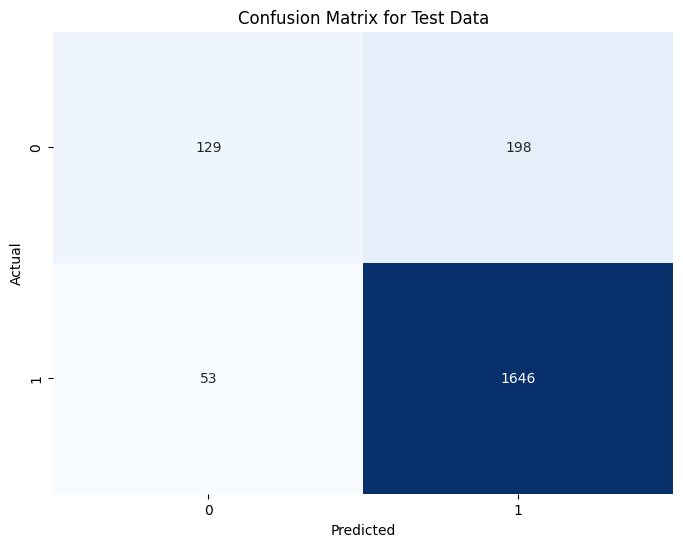

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_logistic, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Test Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

dengan confusion matrix model kita mampu memahami positif dan negatif dari prediksi. True positif bernilai 1646 dengan support 1699 sehingga terdapat 53 False Positif atau nilai yang seharusnya Negatif.

ini juga mengartikan model kita tidak sensitif terhadap churn, dikarenakan model memiliki nilai TP yang tinggi.

jika kita ingin mengetahui nilai positif ini mewakili apa, kita bisa menghitunga tiap value pada churn (value count pada kolom target) dan bandingkan jumlahnya dengan support pada train dan test dengan begitu kita bisa mengetahui negatif dan positif ini mewakili nilai apa.

In [ ]:
y_test.value_counts()

attrition_flag
1    1699
0     327
Name: count, dtype: int64

##ROC Curves

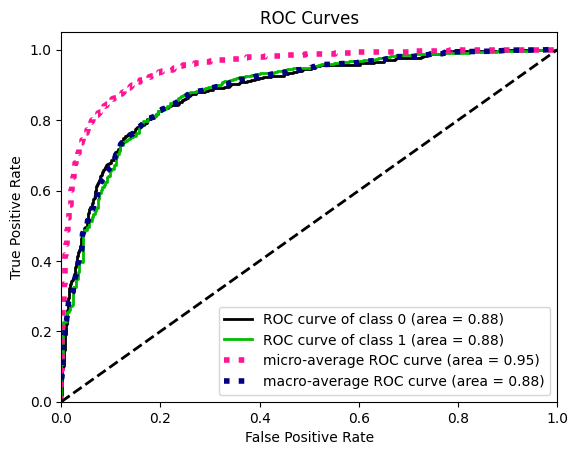

In [ ]:
y_test_pred_logistic_prob =  logistic.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_test_pred_logistic_prob);

dari ROC curve terlihat nilai True yang tinggi (lengkungan atau curve mendekati pojok atas kiri), model ini bisa menghasilkan nilai true pada tiap class (nilai negatif dan positif) dengan sangat baik

Dengan begitu memiliki model Logistic Regression sudah menjadi opsi yang bagus walaupun nilai akurasi tidak sebesar model yang lainnya, tetapi model ini sudah memahami data dengan baik karena nilai True yang besar pada Cunfusion Matrix dan Curve yang mendekati True pada ROC.

#No.4 Interpretasi model

In [ ]:
# Menampilkan intercept
print("\nIntercept:")
print(logistic.intercept_)

# Hitung log-odds
log_odds = logistic.intercept_ + (X_train * logistic.coef_).sum(axis=1)

# Menampilkan log-odds
print("\nLog-Odds:")
print(log_odds)

# Hitung odds ratio
odds_ratio = np.exp(logistic.coef_)

Koefisien_df = pd.DataFrame(data=logistic.coef_,columns=X.columns)
OddsRation_df = pd.DataFrame(data=odds_ratio,columns=X.columns)


Intercept:
[-0.04430967]

Log-Odds:
9066    2.388534
5814   -1.213839
792     1.264836
1791    1.882765
5011    3.061358
          ...   
5734    2.211891
5191   -2.252864
5390    3.268260
860     2.880616
7270    5.078773
Length: 8101, dtype: float64


In [ ]:
Koefisien_df

,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,-0.025914,0.063062,-0.254924,-0.13526,-0.1166,-0.250709,-0.016669,0.029571,0.335614,-0.381771,-0.45463,0.000268,0.00053,-0.000263,0.02545,-0.000305,0.087254,0.096634,-0.002889


In [ ]:
OddsRation_df

,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,0.974419,1.065093,0.774975,0.873489,0.889941,0.778249,0.98347,1.030012,1.398799,0.682652,0.634683,1.000268,1.00053,0.999737,1.025777,0.999695,1.091174,1.101457,0.997115


Summary No.4

**Koefisien** / ***Coefficient*** menampilkan sejumlah nilai kontribusi pada tiap *feature* bila dinaikkan satu anggka (hubungan antara data independent dengan dependent), contoh pada kolom total_ct_chng_q4_q1 memiliki nilai koefisien yang tinggi tandanya tiap naik 1 nilai pada *feature* tersebut akan memberikan perubahan sebesar 0.096 pada target.

Interpretasi **odds ratio** adalah faktor perubahan dalam odds/kemungkinan (probabilitas sukses dibagi dengan probabilitas kegagalan) yang terkait dengan satu unit perubahan dalam variabel independen, ketika semua variabel lainnya tetap konstan. *Odds ratio* sendiri merupkana eksponensial dari Koefisien.


**rumus *Odds Ratio*: OR=e^β**

***Odds Ratio***(OR) merupakan penilaian hubungan langsung antara variable dependent dengan variable independent. Sedangkan *Coefficient* yang digunakan untuk menghasilkan *Odds Ratio*.

Personal Note, jika model non-interpretable

In [ ]:
churn_lgb_exp = dx.Explainer(lgb, X_train, y_train, label = "Light Gradient Boosting Interpretation")

Preparation of a new explainer is initiated

  -> data              : 8101 rows 19 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 8101 values
  -> model_class       : lightgbm.sklearn.LGBMClassifier (default)
  -> label             : Light Gradient Boosting Interpretation
  -> predict function  : <function yhat_proba_default at 0x7ed481ffc040> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.000309, mean = 0.84, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.428, mean = 1.8e-05, max = 0.442
  -> model_info        : package lightgbm

A new explainer has been created!


In [ ]:
churn_lgb_exp.model_parts().plot()

In [ ]:
churn_lgb_exp.model_profile().plot()

Calculating ceteris paribus: 100%|██████████| 19/19 [00:05<00:00,  3.32it/s]
